In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
%matplotlib inline

# Train_Test_Split
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance

# Misc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.030372,0.874460,0.081671,1.09500,-76.581,0.00000,0.038522,0.143570,1.9677,0.125540,...,0.001575,0.24192,0.97971,0.034768,4.0379,4.6154,159.520,2.2881,33.7230,1
1,0.032686,0.827750,0.020096,1.05040,-41.614,0.00000,0.041231,0.208090,1.0546,0.172250,...,0.041392,0.18977,0.96152,1.415700,9.4101,3.9256,137.870,2.6474,1.8134,1
2,0.649890,0.098723,0.483760,5.90020,264.600,0.00000,0.815270,9.128800,1.4604,0.901230,...,0.557580,0.72112,0.44213,0.000000,9.7917,5.1698,24.673,14.7930,3.4984,1
3,0.075803,0.760570,-0.199050,0.51163,-57.769,0.00000,0.089522,0.314760,1.6573,0.239400,...,0.239020,0.31664,0.78417,1.196100,35.6190,10.8850,89.765,4.0662,2.0941,1
4,-0.179970,0.953480,-0.346650,0.63643,-207.040,-0.43095,-0.179970,0.048788,1.1999,0.046519,...,0.026425,-3.86880,0.96751,0.000000,2.9261,6.1379,290.030,1.2585,3.0519,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43405 non-null  float64
 1   Attr2   43405 non-null  float64
 2   Attr3   43405 non-null  float64
 3   Attr4   43405 non-null  float64
 4   Attr5   43405 non-null  float64
 5   Attr6   43405 non-null  float64
 6   Attr7   43405 non-null  float64
 7   Attr8   43405 non-null  float64
 8   Attr9   43405 non-null  float64
 9   Attr10  43405 non-null  float64
 10  Attr11  43405 non-null  float64
 11  Attr12  43405 non-null  float64
 12  Attr13  43405 non-null  float64
 13  Attr14  43405 non-null  float64
 14  Attr15  43405 non-null  float64
 15  Attr16  43405 non-null  float64
 16  Attr17  43405 non-null  float64
 17  Attr18  43405 non-null  float64
 18  Attr19  43405 non-null  float64
 19  Attr20  43405 non-null  float64
 20  Attr21  43405 non-null  float64
 21  Attr22  43405 non-null  float64
 22

In [4]:
x = data.drop(['class'], axis = 1)
y = data['class']

In [5]:
scaler = RobustScaler()
scaled = scaler.fit_transform(x)
x_scl = pd.DataFrame(data = scaled, columns = x.columns)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scl, y, test_size = 0.2, random_state = 101)

In [7]:
trial_lr = LogisticRegression()
trial_dt = DecisionTreeClassifier()
trial_rf = RandomForestClassifier()
trial_ada = AdaBoostClassifier(base_estimator = trial_dt)
trial_gb = GradientBoostingClassifier()
trial_bc = BaggingClassifier(base_estimator = trial_dt)
trial_xgb = XGBClassifier()

trial_lr.fit(x_train, y_train)
trial_dt.fit(x_train, y_train)
trial_rf.fit(x_train, y_train)
trial_ada.fit(x_train, y_train)
trial_gb.fit(x_train, y_train)
trial_bc.fit(x_train, y_train)
trial_xgb.fit(x_train, y_train)


trial_lr_predict = trial_lr.predict(x_test)
trial_dt_predict = trial_dt.predict(x_test)
trial_rf_predict = trial_rf.predict(x_test)
trial_ada_predict = trial_ada.predict(x_test)
trial_gb_predict = trial_gb.predict(x_test)
trial_bc_predict = trial_bc.predict(x_test)
trial_xgb_predict = trial_xgb.predict(x_test)

C:\Users\Dani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
trial_model = [trial_lr,trial_dt,trial_rf,trial_ada,trial_gb,trial_bc,trial_xgb]
trial_predict = [trial_lr_predict,trial_dt_predict,trial_rf_predict,trial_ada_predict,trial_gb_predict,trial_bc_predict,trial_xgb_predict]

for pred, model in zip(trial_predict, trial_model):
    print(model.__class__.__name__)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('~'*125)

LogisticRegression
[[7643  609]
 [ 349   80]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8252
           1       0.12      0.19      0.14       429

    accuracy                           0.89      8681
   macro avg       0.54      0.56      0.54      8681
weighted avg       0.91      0.89      0.90      8681

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DecisionTreeClassifier
[[8089  163]
 [ 155  274]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8252
           1       0.63      0.64      0.63       429

    accuracy                           0.96      8681
   macro avg       0.80      0.81      0.81      8681
weighted avg       0.96      0.96      0.96      8681

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

From our trial above, we can conclude that there are imbalancies in our target feature. All the model could predict event 0 (not bankrupt) very well but for event 1 (bankrupt) all the model suggests perform poorly. To overcome this probelm I'm going to use oversampling method to raise the count of event 1 (bankrupt).

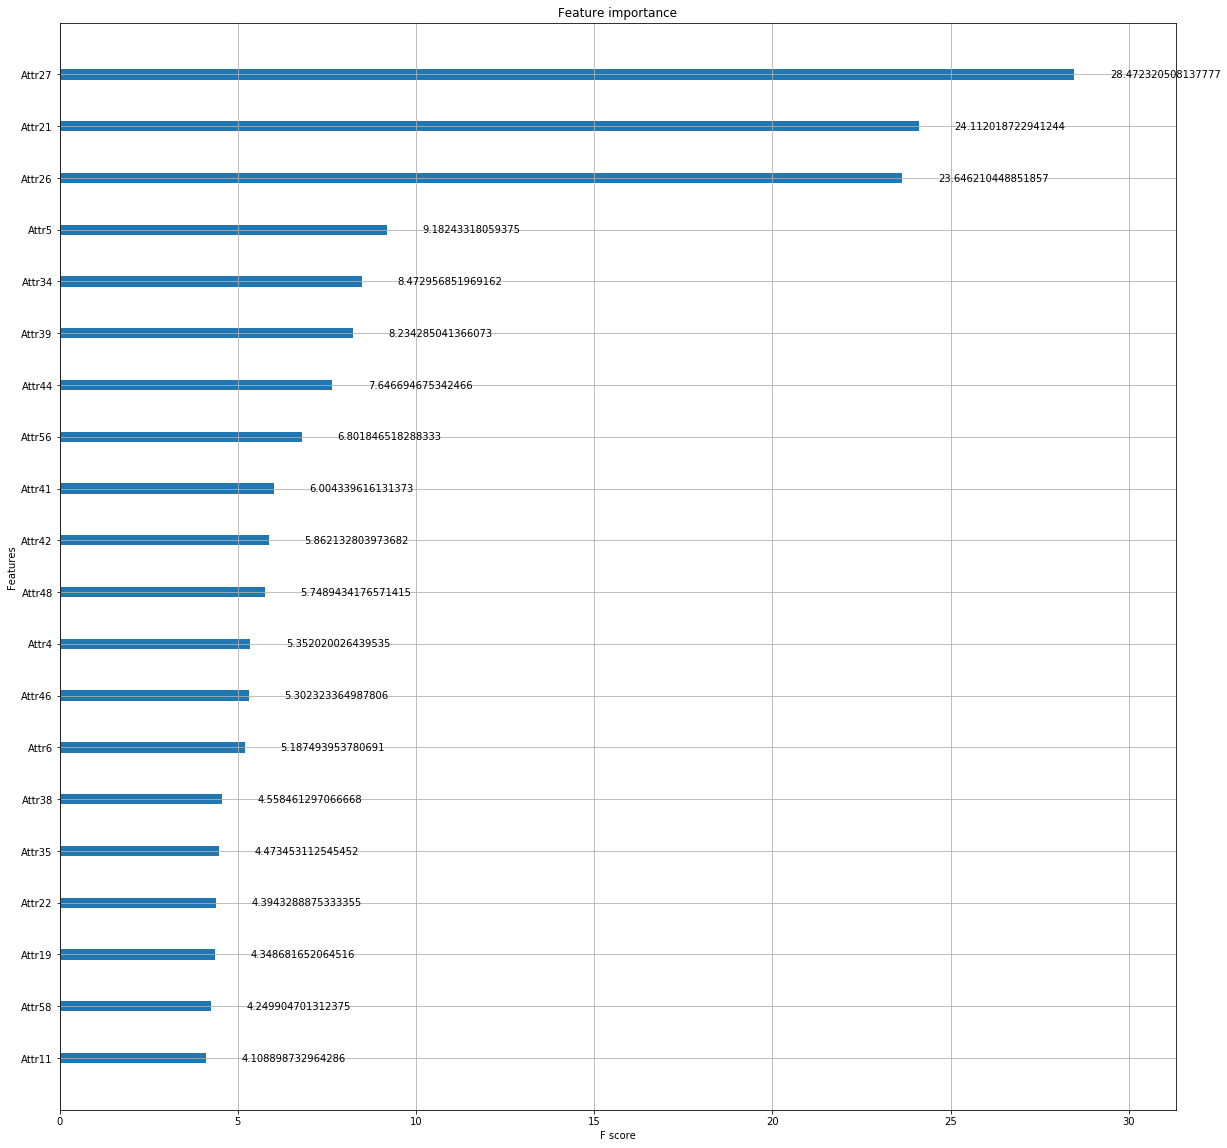

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(trial_xgb, importance_type = 'gain', max_num_features = 20, ax = ax)

Graph above is describing what features is most important predicted by the model Extra Gradient Boosting, I take the 20 highest important features.

In [10]:
gb_important = pd.DataFrame(data = trial_gb.feature_importances_.reshape(-1, 1), columns = ['Score'], index = x_train.columns)
gb_important.nlargest(20, columns = 'Score')

,Score
Attr27,0.437375
Attr21,0.329747
Attr46,0.031372
Attr24,0.024573
Attr56,0.022254
Attr34,0.017208
Attr44,0.015894
Attr41,0.015159
Attr5,0.012532
Attr4,0.011787


Table shown above is feature importance based on model Gradient Boosting Classifier. It shows the 20 highest importance in the model. And for further analysis, I'm going to stick with Gradient Boosting Classifier and Extreme Gradient Boosting Classifier since they perform the best in this trial.

In [11]:
print('Before Oversampling, counts of label 1: {}'.format(sum(y_train == 1)))
print('Before Oversampling, counts of label 0: {}'.format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

print('After Oversampling, the shape of x_train: {}'.format(x_train_res.shape))
print('After Oversampling, the shape of y_train: {}'.format(y_train_res.shape))

print('After Oversampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After Oversampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

Before Oversampling, counts of label 1: 1662
Before Oversampling, counts of label 0: 33062
After Oversampling, the shape of x_train: (66124, 63)
After Oversampling, the shape of y_train: (66124,)
After Oversampling, counts of label 1: 33062
After Oversampling, counts of label 0: 33062


In [12]:
# Training the model again with oversampled data

smote_gb = GradientBoostingClassifier()
smote_xgb = XGBClassifier()

smote_gb.fit(x_train_res, y_train_res)
smote_xgb.fit(x_train_res, y_train_res)

smote_gb_predict = smote_gb.predict(x_test)
smote_xgb_predict = smote_xgb.predict(x_test)

In [13]:
smote_model = [smote_gb, smote_xgb]
smote_predict = [smote_gb_predict, smote_xgb_predict]

for pred, model in zip(smote_predict, smote_model):
    print(model.__class__.__name__)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('~'*125)

GradientBoostingClassifier
[[7377  875]
 [  58  371]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      8252
           1       0.30      0.86      0.44       429

    accuracy                           0.89      8681
   macro avg       0.64      0.88      0.69      8681
weighted avg       0.96      0.89      0.92      8681

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
XGBClassifier
[[8121  131]
 [  65  364]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8252
           1       0.74      0.85      0.79       429

    accuracy                           0.98      8681
   macro avg       0.86      0.92      0.89      8681
weighted avg       0.98      0.98      0.98      8681

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

This evaluation semms interesting. After applying oversampling method, Extra Gradient Boosting perform well in overall. Now, let's see the important features. 

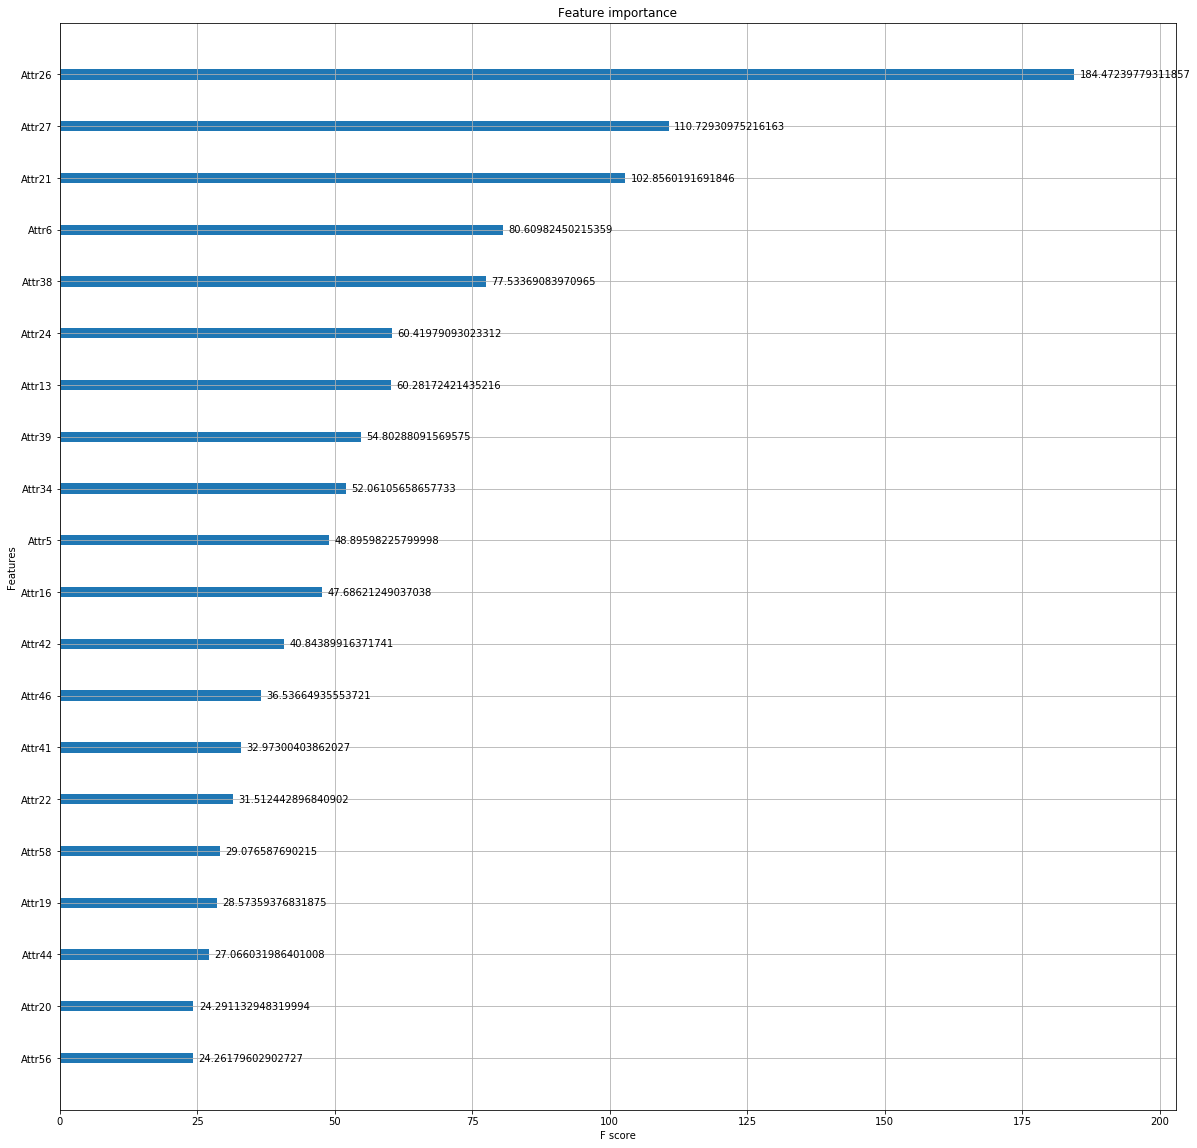

In [14]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(smote_xgb, importance_type = 'gain', max_num_features = 20, ax = ax)

In [15]:
gb_important_smote = pd.DataFrame(data = smote_gb.feature_importances_.reshape(-1, 1), columns = ['Score'], index = x_train.columns)
gb_important_smote.nlargest(20, columns = 'Score')

,Score
Attr27,0.244325
Attr21,0.135924
Attr6,0.095961
Attr24,0.068904
Attr34,0.060797
Attr26,0.059462
Attr38,0.052684
Attr46,0.051083
Attr39,0.045881
Attr5,0.026041


Now, let's evaluate the feature importance before and after SMOTE. Knowing feature importance is essential to make our model run effectively and efficiently. After looking for similarity in each feature importance, I found 13 features that always showed up in the models top 20 feature importances. And then there are 2 feautres that only shows 3 times in the models top 20 feature importances. I will try to examine the 13 features, the 13 + 2 features with XGB models, and all the smote XGB feature importances hope the models evaluation increased.

In [20]:
xtr_res = x_train_res[['Attr27','Attr21','Attr26','Attr46','Attr6','Attr38','Attr39','Attr34','Attr5','Attr41','Attr58','Attr44','Attr56']]
xtr_res.shape

(66124, 13)

In [21]:
xts = x_test[xtr_res.columns]
xts

,Attr27,Attr21,Attr26,Attr46,Attr6,Attr38,Attr39,Attr34,Attr5,Attr41,Attr58,Attr44,Attr56
29939,1.204377,4.553583,-0.167564,0.257752,0.000000,-0.374123,-0.187389,1.263609,0.178588,0.591804,0.267686,-0.006477,-0.270979
20846,0.913580,-0.748310,1.845313,1.100151,0.000000,0.405290,0.884999,1.235643,0.751705,-0.357596,-0.791012,-0.147915,0.513257
10611,1.180031,-0.347060,-0.068091,-0.527880,0.000000,-0.560076,-0.043150,0.503776,-0.529498,0.252056,0.062372,-0.910245,-0.165497
36227,-0.172363,-3.912480,1.053257,10.722166,0.522311,1.062789,-0.042043,-0.392227,2.976130,0.150304,0.142772,2.262724,-0.168860
15937,2.974309,0.805944,0.265794,-0.162111,0.000000,-0.405887,-0.745187,-0.123529,-1.397305,0.011317,-0.666353,1.432782,0.850594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21956,-0.083203,-0.823700,0.119258,0.102793,2.763721,0.584084,0.357090,-0.398426,0.050671,0.145827,-0.164132,-0.660868,0.130962
39401,-0.250550,0.507493,0.280196,-0.230870,0.000000,0.055232,-0.243127,0.157645,-0.370500,3.313974,-1.456169,0.306661,1.489630
17008,-0.169026,-0.946648,-0.085241,-0.229464,2.898782,-0.112765,-0.011230,-0.417906,-0.218584,0.219688,0.454375,-0.444488,-0.472829
15430,-0.250550,-0.462998,-0.736389,-0.523962,0.000000,-0.480041,-0.406011,0.195483,-0.854774,56.164238,0.135167,-0.291016,-0.064046


In [22]:
new_xgb = XGBClassifier()
new_xgb.fit(xtr_res, y_train_res)
new_xgb_predict = new_xgb.predict(xts)
print(confusion_matrix(y_test, new_xgb_predict))
print('~'*125)
print(classification_report(y_test, new_xgb_predict))

[[7873  379]
 [  54  375]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      8252
           1       0.50      0.87      0.63       429

    accuracy                           0.95      8681
   macro avg       0.75      0.91      0.80      8681
weighted avg       0.97      0.95      0.96      8681



In [23]:
xtr2_res = x_train_res[['Attr27','Attr21','Attr26','Attr46','Attr6','Attr38','Attr39','Attr34',
                        'Attr5','Attr41','Attr58','Attr44','Attr56','Attr24','Attr42']]
xts2_res = x_test[xtr2_res.columns]

In [24]:
new_xgb2 = XGBClassifier()
new_xgb2.fit(xtr2_res, y_train_res)
new_xgb2_predict = new_xgb2.predict(xts2_res)
print(confusion_matrix(y_test, new_xgb2_predict))
print('~'*125)
print(classification_report(y_test, new_xgb2_predict))

[[7947  305]
 [  52  377]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      8252
           1       0.55      0.88      0.68       429

    accuracy                           0.96      8681
   macro avg       0.77      0.92      0.83      8681
weighted avg       0.97      0.96      0.96      8681



In [26]:
xtr3_res = x_train_res[['Attr27','Attr21','Attr26','Attr46','Attr6','Attr38','Attr39','Attr34',
                        'Attr5','Attr41','Attr58','Attr44','Attr56','Attr24','Attr42','Attr13',
                        'Attr16','Attr22','Attr19','Attr20']]
xts3_res = x_test[xtr3_res.columns]

In [27]:
new_xgb3 = XGBClassifier()
new_xgb3.fit(xtr3_res, y_train_res)
new_xgb3_predict = new_xgb3.predict(xts3_res)
print(confusion_matrix(y_test, new_xgb3_predict))
print('~'*125)
print(classification_report(y_test, new_xgb3_predict))

[[7973  279]
 [  60  369]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8252
           1       0.57      0.86      0.69       429

    accuracy                           0.96      8681
   macro avg       0.78      0.91      0.83      8681
weighted avg       0.97      0.96      0.96      8681



There are some interesting results here. After I predict using the feature importances only, the evaluation metrics of the model is increased. But, If I look closely, the model's precision for predicting event 1 is always increased, but the recall is reduced after i use all the feature importances of smote'd XGB. If we look closely to the Confusion Matrix, the number of True Negative (model correctly predicts event 0/not bankrupt) is always increasing but the number of True Positive (model correctly predicts event 1/bankrupt) is reduced if we predict it with all the smote'd XGB's feature importances. For false positive(model predicts the company is 1/bankrupt but it actually survived) the number is always reduced, and the number of false negative(model predicts the company is 0/survived but it is actually bankrupt) is reduced and rise again until I apply every smote'd XGB's important features.<br/><br/>
In this prediction model, we try to predict bankruptcy as much as possible, which means we try to suppressed the number of false negative, because if we incorrectly predict nearly bankrupt company as not_bankrupt, no problems will be solved and the company will be bankrupt. In difference with false positive, if we predict the company as bankrupt but, it actually could survive, then the manager or company's owner will perform well to safe the company and perform better than usual. Basically, we want to suppressed every faulty in our predictions, but in this situation, I had to choose lower false negative rate and higher true positive rate.<br/><br/>
Because I chose to suppressed the false negative rate and choose higher true positive rate, it had an impact to the model evaluation. In this situation, I want to focused to achieve greater value on positive recall (higher sensitivity), because positive recall shows the rate of my model model correctly predicts positive event (bankrupt).<br/><br/>  
<center> $ Positive Recall = \frac{True Positive}{True Positive + False Negative} $ </center><br/>
In my trial, increase of positive recall score is followed by reduced positive precision score. .Let's see the formula of positive precision:<br/><br/>
<center> $ Positive Precision = \frac{True Positive}{True Positive + False Positive} $ </center><br/>
It happens because bigger true positive rate result in bigger denominator in positive precision, followed by the already big false positive rate, makes the positive precision denominator is getting bigger and reducing the positive precision rate.<br/><br/>
Now I'm going to tune the model's parameters to try achieving better result.

In [28]:
 param = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [29]:
from sklearn.model_selection import GridSearchCV
tune_xgb = XGBClassifier()
tuned_xgb = GridSearchCV(
    tune_xgb, param, cv = 5
)
tuned_xgb.fit(x_train[['Attr27','Attr21','Attr26','Attr46','Attr6','Attr38','Attr39','Attr34',
                        'Attr5','Attr41','Attr58','Attr44','Attr56','Attr24','Attr42']], y_train)
tuned_xgb.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.25,
 'max_depth': 6,
 'min_child_weight': 5}

In [31]:
best_xgb = XGBClassifier(
    colsample_bytree = 0.7,
    gamma = 0.0,
    learning_rate = 0.25,
    max_depth = 6,
    min_child_weight = 5
)
best_xgb.fit(xtr2_res, y_train_res)
y_pred = best_xgb.predict(xts2_res)
print(confusion_matrix(y_test, y_pred))
print('~'*125)
print(classification_report(y_test, y_pred))

[[7869  383]
 [  55  374]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      8252
           1       0.49      0.87      0.63       429

    accuracy                           0.95      8681
   macro avg       0.74      0.91      0.80      8681
weighted avg       0.97      0.95      0.96      8681



In [32]:
best_xgb2 = XGBClassifier(
    colsample_bytree = 0.7,
    gamma = 0.3,
    learning_rate = 0.3,
    max_depth = 5,
    min_child_weight = 5
)
best_xgb2.fit(xtr2_res, y_train_res)
y_predict = best_xgb2.predict(xts2_res)
print(confusion_matrix(y_test, y_predict))
print('~'*125)
print(classification_report(y_test, y_predict))

[[7831  421]
 [  51  378]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      8252
           1       0.47      0.88      0.62       429

    accuracy                           0.95      8681
   macro avg       0.73      0.92      0.79      8681
weighted avg       0.97      0.95      0.95      8681



In [33]:
xgboost = XGBClassifier(learning_rate = 0.01, n_estimators = 1000, max_depth = 4, n_jobs = -1)
xgboost.fit(xtr2_res, y_train_res)
y_xgboost = xgboost.predict(xts2_res)
print(confusion_matrix(y_test, y_xgboost))
print('~'*125)
print(classification_report(y_test, y_xgboost))

[[7424  828]
 [  47  382]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      8252
           1       0.32      0.89      0.47       429

    accuracy                           0.90      8681
   macro avg       0.65      0.90      0.71      8681
weighted avg       0.96      0.90      0.92      8681



In [3]:
import pandas as pd
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

In [5]:
pd.__version__

'1.0.1'